In [2]:
import pandas as pd
import sys
sys.path.insert(0, '../') # Needed to import the DATES_STRINGS constant from a Python file.
from init_data import DATES_STRINGS
file_path = '../03_clean_dbs/clean_relevant_db.csv'
relevant_df = pd.read_csv(file_path, index_col=0, encoding='utf-8')
relevant_df[DATES_STRINGS] = relevant_df[DATES_STRINGS].astype(int) # Change types of columns from float to int
relevant_df['total_relevance'] = relevant_df['ukraine_relevance'] + relevant_df['russia_relevance']

In [3]:
stats_df = relevant_df[['value'] + DATES_STRINGS]

<AxesSubplot:title={'center':'Total Number of Monthly Pageviews'}, xlabel='Year & Month', ylabel='Pageviews in hunderds of millions'>

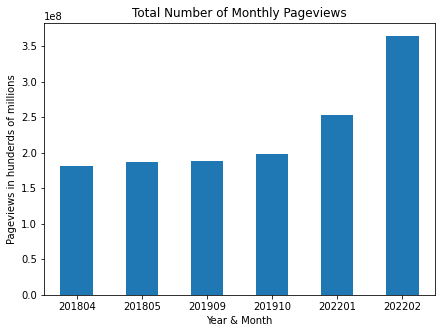

In [4]:
short_labels = {date: date[0:6] for date in DATES_STRINGS}
sums_df = stats_df[DATES_STRINGS].rename(columns=short_labels).sum()
sums_df.plot.bar(
  title='Total Number of Monthly Pageviews',
  ylabel='Pageviews in hunderds of millions',
  xlabel='Year & Month',
  figsize=(7,5),
  rot=0
)

Calculate amount of change, inside categories of relevancy:

d:\Nir\מסמכים של ניר\אוניברסיטת תל אביב\2021-2022\סמסטר ו\רשתות מורכבות\wikipedia-usage-network\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:title={'center':'Total Number of Monthly Pageviews by Relevancy'}, xlabel='Year & Month', ylabel='Pageviews in hunderds of millions'>

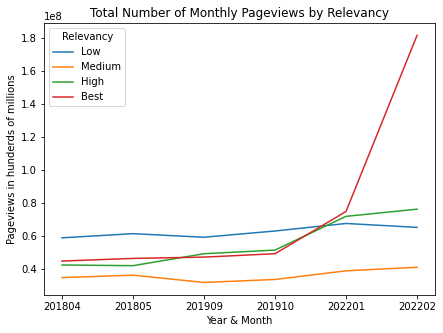

In [12]:
relevancy_df = relevant_df[['total_relevance'] + DATES_STRINGS]
relevancy_df['Relevancy'] = pd.qcut(relevancy_df['total_relevance'], q=4, labels=['Low', 'Medium', 'High', 'Best'])
relevance_view_df = relevancy_df[['Relevancy'] + DATES_STRINGS].rename(columns=short_labels).groupby('Relevancy', as_index=True).sum()
relevance_view_df.T.plot.line(
  figsize=(7,5),
  title='Total Number of Monthly Pageviews by Relevancy',
  ylabel='Pageviews in hunderds of millions',
  xlabel='Year & Month',
)
